# **Import Libraries**

In [36]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM,GRU
print("All libraries have been imported")

All libraries have been imported


In [2]:
df = pd.read_csv('/content/CrudeOil.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
5,2010-01-10,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-01-11,82.879997,83.949997,81.959999,82.519997,82.519997,310377.0
7,2010-01-12,82.070000,82.339996,79.910004,80.790001,80.790001,296304.0
8,2010-01-13,80.059998,80.669998,78.370003,79.650002,79.650002,333866.0
9,2010-01-14,79.629997,80.360001,78.919998,79.389999,79.389999,401627.0


# We have NaN values and we drop these values.

In [3]:
df.dropna(inplace=True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
6,2010-01-11,82.879997,83.949997,81.959999,82.519997,82.519997,310377.0
7,2010-01-12,82.070000,82.339996,79.910004,80.790001,80.790001,296304.0
8,2010-01-13,80.059998,80.669998,78.370003,79.650002,79.650002,333866.0
9,2010-01-14,79.629997,80.360001,78.919998,79.389999,79.389999,401627.0
10,2010-01-15,79.199997,79.309998,77.699997,78.000000,78.000000,275404.0


In [4]:
df.shape

(2495, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2495 entries, 0 to 3037
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2495 non-null   object 
 1   Open       2495 non-null   float64
 2   High       2495 non-null   float64
 3   Low        2495 non-null   float64
 4   Close      2495 non-null   float64
 5   Adj Close  2495 non-null   float64
 6   Volume     2495 non-null   float64
dtypes: float64(6), object(1)
memory usage: 220.5+ KB



# We will drop the columns we don't need then convert "Date" column to datatime data type and set "Date" column to index.

In [6]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2495 entries, 0 to 3037
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2495 non-null   object 
 1   Adj Close  2495 non-null   float64
dtypes: float64(1), object(1)
memory usage: 58.5+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df_chg= df.set_index(['Date'], drop=True)
df_chg.head()

,Adj Close
Date,
2010-01-04,81.510002
2010-01-05,81.769997
2010-01-06,83.180000
2010-01-07,82.660004
2010-01-08,82.750000


# **The Plotting**
We plot a time series line plot

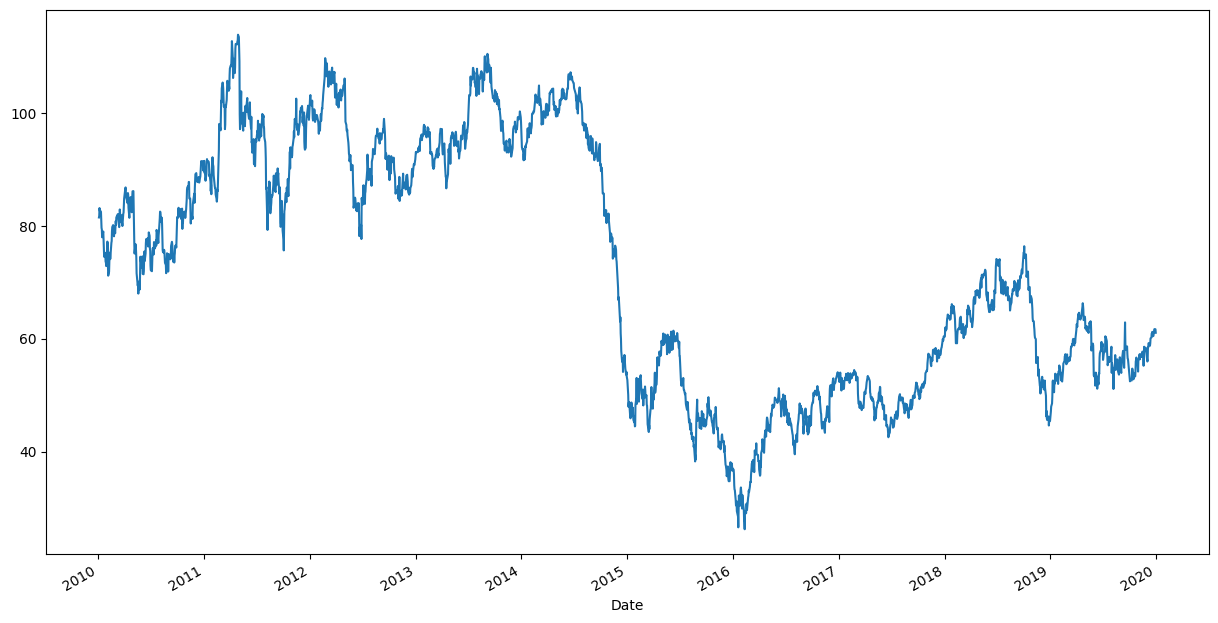

In [8]:
plt.figure(figsize=(15,8))
df_chg['Adj Close'].plot();


The "Adj Close" data seems to show a random pattern.

# **Split The Data**
We split the data by nearly %80 and %20 to train and test. Split the data to train and test set by date "2017-12-27". That is, the data prior to this date is the traning data and the data from this data onward is the test data and we plotting it again.

In [9]:
split_date = pd.Timestamp('2017-12-27')
df1 = df_chg['Adj Close']
train = df1.loc[:split_date]
test = df1.loc[split_date:]

In [10]:
print(split_date)
print(df1)


2017-12-27 00:00:00
Date
2010-01-04    81.510002
2010-01-05    81.769997
2010-01-06    83.180000
2010-01-07    82.660004
2010-01-08    82.750000
                ...    
2019-12-23    60.520000
2019-12-26    61.680000
2019-12-27    61.720001
2019-12-30    61.680000
2019-12-31    61.060001
Name: Adj Close, Length: 2495, dtype: float64


In [11]:
print("train the data",train)
print("train the data",test)

train the data Date
2010-01-04    81.510002
2010-01-05    81.769997
2010-01-06    83.180000
2010-01-07    82.660004
2010-01-08    82.750000
                ...    
2017-12-20    58.090000
2017-12-21    58.360001
2017-12-22    58.470001
2017-12-26    59.970001
2017-12-27    59.639999
Name: Adj Close, Length: 1996, dtype: float64
train the data Date
2017-12-27    59.639999
2017-12-28    59.840000
2017-12-29    60.419998
2018-01-02    60.369999
2018-01-03    61.630001
                ...    
2019-12-23    60.520000
2019-12-26    61.680000
2019-12-27    61.720001
2019-12-30    61.680000
2019-12-31    61.060001
Name: Adj Close, Length: 500, dtype: float64


**Create a line plot using Plotly Express**

In [12]:
fig = px.line(df1, title='Training and Test Data', labels={'index': 'Date', 'value': 'Adjusted Close'})
fig.add_scatter(x=train.index, y=train, mode='lines', name='Training Data', line=dict(color='blue'))
fig.add_scatter(x=test.index, y=test, mode='lines', name='Test Data', line=dict(color='red'))

# Display the plot
fig.show()

# **Scale The Data**

We scale train and test data to [-1, 1]

We splited train and test with Date values. We have to convert datas.

In [13]:
print("We have", len(train), "train values")
print("We have", len(test), "test values")

We have 1996 train values
We have 500 test values



We split train and test again

In [14]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed

array([[81.510002],
       [81.769997],
       [83.18    ],
       ...,
       [61.720001],
       [61.68    ],
       [61.060001]])

In [15]:
train_processed = train_processed[0:1996:1]
train_processed

array([[81.510002],
       [81.769997],
       [83.18    ],
       ...,
       [58.470001],
       [59.970001],
       [59.639999]])

In [16]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:1996:1]
test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[1995:2495:1]

and scale datas

In [17]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)

Get traning and test data

In [18]:
X_train = train_sc[:-1]
y_train = train_sc[1:]


In [19]:
X_test = test_sc[:-1]
y_test = test_sc[1:]

# **Simple ANN - Traning Model**


In [21]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0043
Epoch 2/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0017
Epoch 3/100
1995/1995 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 4/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0014
Epoch 5/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 6/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 7/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 8/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0014
Epoch 9/100
1995/1995 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 10/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0013
Epoch 11/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 12/100
1995/1995 [==============================] - 4s 2ms/step - lo

In [22]:
y_pred_test_nn = nn_model.predict(X_test)
y_pred_test_nn

16/16 [==============================] - 0s 2ms/step


array([[-0.25063476],
       [-0.24776854],
       [-0.23945656],
       [-0.24017307],
       [-0.22211592],
       [-0.21667016],
       [-0.22483885],
       [-0.22068283],
       [-0.20305564],
       [-0.19431368],
       [-0.19101754],
       [-0.18385196],
       [-0.1920207 ],
       [-0.18858123],
       [-0.18886785],
       [-0.19717991],
       [-0.19546014],
       [-0.1814157 ],
       [-0.1635789 ],
       [-0.16625975],
       [-0.14772439],
       [-0.1649194 ],
       [-0.18098578],
       [-0.17768958],
       [-0.15796605],
       [-0.16737132],
       [-0.18600163],
       [-0.19689327],
       [-0.21982294],
       [-0.22899483],
       [-0.25694042],
       [-0.2556506 ],
       [-0.25708374],
       [-0.23687693],
       [-0.22627194],
       [-0.22139937],
       [-0.21824652],
       [-0.22139937],
       [-0.20577852],
       [-0.19460031],
       [-0.18944111],
       [-0.2023391 ],
       [-0.22197264],
       [-0.2312878 ],
       [-0.22756174],
       [-0

In [24]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

63/63 [==============================] - 0s 1ms/step
The R2 score on the Train set is:	0.954
The R2 score on the Test set is:	0.907


# **LSTM - Traning Model**

We use shift function that shifts the entire column by 1.

In [25]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_dim=1, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0070
Epoch 2/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0021
Epoch 3/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0014
Epoch 4/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0013
Epoch 5/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0013
Epoch 6/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0012
Epoch 7/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0012
Epoch 8/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0012
Epoch 9/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0012
Epoch 10/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0012
Epoch 11/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0012
Epoch 12/100
1995/1995 [==============================] - 5s 3ms/step - lo

In [27]:
y_pred_test_lstm = lstm_model.predict(X_test)
y_train_pred_lstm = lstm_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

63/63 [==============================] - 0s 3ms/step
The R2 score on the Train set is:	0.959
The R2 score on the Test set is:	0.935


# **GRU-Training Model**

In [28]:

gru_model = Sequential()
gru_model.add(GRU(7, input_shape=(X_train.shape[1], 1), activation='relu'))
gru_model.add(Dense(1))

gru_model.compile(loss='mean_squared_error', optimizer='adam')


early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)


history_gru_model = gru_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0061
Epoch 2/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0021
Epoch 3/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0015
Epoch 4/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0014
Epoch 5/100
1995/1995 [==============================] - 6s 3ms/step - loss: 0.0014
Epoch 6/100
1995/1995 [==============================] - 6s 3ms/step - loss: 0.0014
Epoch 7/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0014
Epoch 8/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0014
Epoch 9/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0014
Epoch 10/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0014
Epoch 11/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0014
Epoch 12/100
1995/1995 [==============================] - 4s 2ms/step - lo

In [29]:
y_pred_test_gru = gru_model.predict(X_test)
y_train_pred_gru = gru_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_gru)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_gru)))

63/63 [==============================] - 0s 3ms/step
The R2 score on the Train set is:	0.944
The R2 score on the Test set is:	0.915


# **Model Evaluation**

In [37]:
# Evaluate each model on the test set
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test, y_test, batch_size=1)
gru_test_mse = gru_model.evaluate(X_test, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)
print('GRU: %f'%gru_test_mse)

499/499 [==============================] - 1s 1ms/step - loss: 0.0019
NN: 0.002100
LSTM: 0.001477
GRU: 0.001925


# **Forecasting**

In [32]:
nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


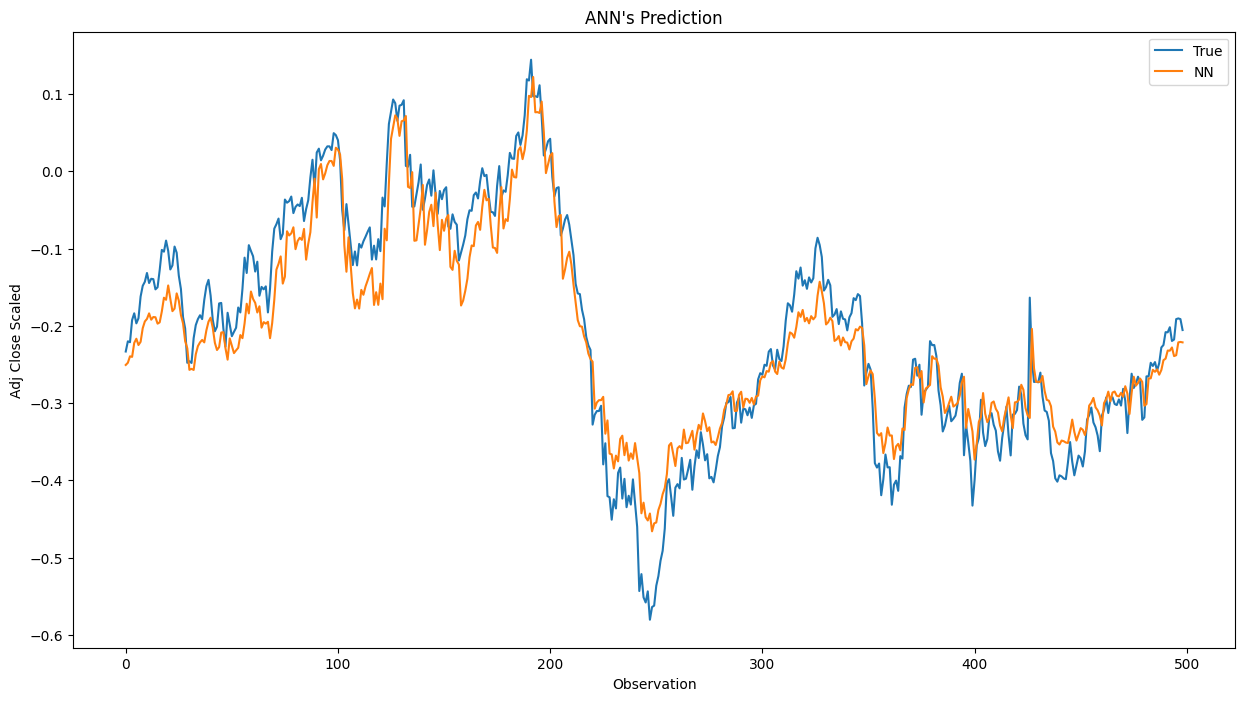

In [33]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

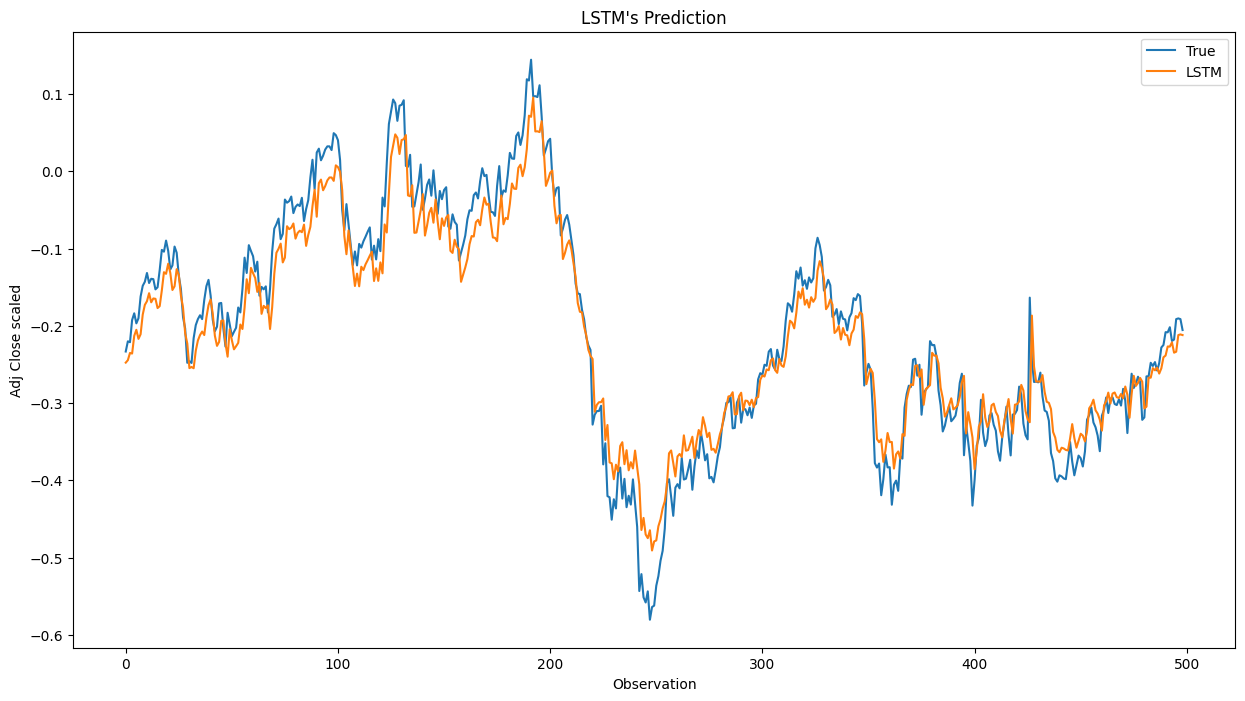

In [34]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

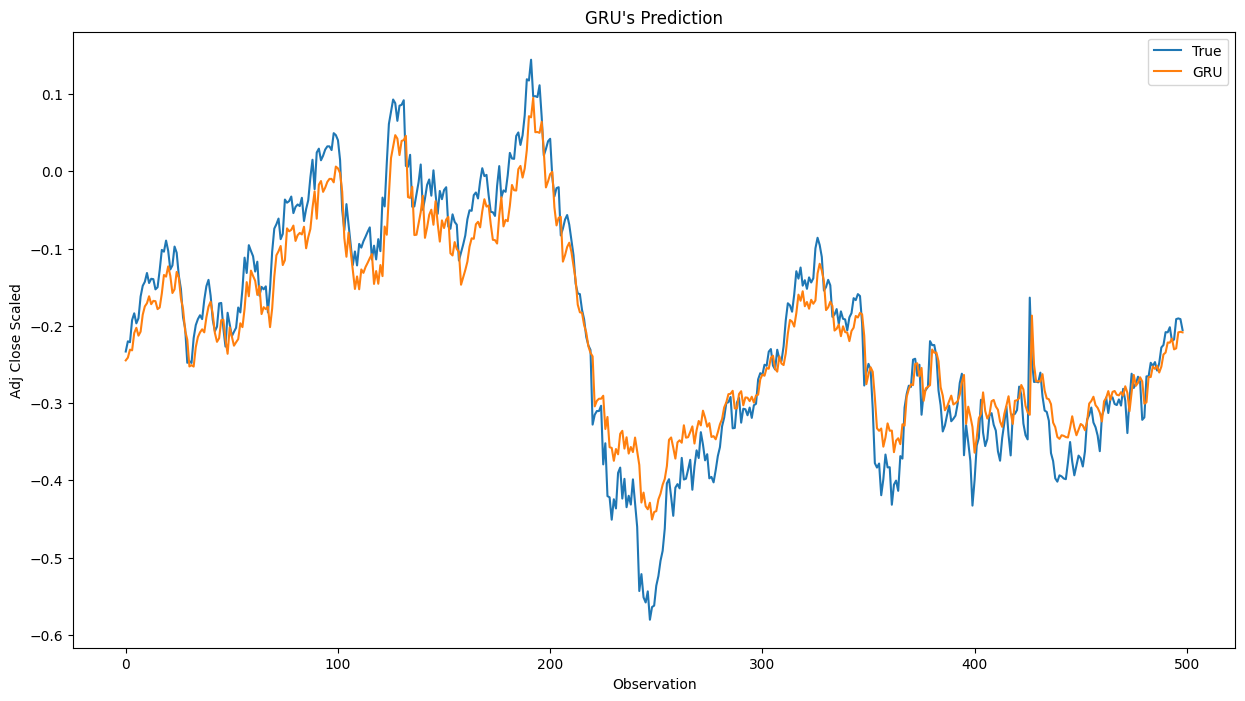

In [35]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_gru, label='GRU')
plt.title("GRU's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

# **Best Model:**

The **LSTM model** is the best performer, as it has the lowest loss value **(0.001477)**. This indicates it captures the patterns in your data more effectively compared to the NN and GRU models.

**Summary:**

**LSTM:** Best performance with the lowest loss.

**GRU:** Second best, but still higher than LSTM.

**NN:** Least effective in this case.